In [27]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [28]:
url="https://www.amazon.in/ASUS-Vivobook-i3-1220P-Graphics-X1502ZA-EJ311WS/product-reviews/B09YHCLB8V"
code=requests.get(url)
code

<Response [200]>

In [29]:
soup=BeautifulSoup(code.content,'html.parser')
print(soup.prettify)

<bound method Tag.prettify of <!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link crossorigin="" href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://images-eu.ssl-images-amazon.com" rel="preconnect"/>
<link crossorigin="" href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://m.media-amazon.com" rel="preconnect"/>
<link crossorigin="" href="https://completion.amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://completion.amazon.com" rel="preconnect"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<!--

In [30]:
star_rating=soup.select('i.review-rating span.a-icon-alt')[2:]
star_rating

[<span class="a-icon-alt">4.0 out of 5 stars</span>,
 <span class="a-icon-alt">5.0 out of 5 stars</span>,
 <span class="a-icon-alt">4.0 out of 5 stars</span>,
 <span class="a-icon-alt">3.0 out of 5 stars</span>,
 <span class="a-icon-alt">5.0 out of 5 stars</span>,
 <span class="a-icon-alt">1.0 out of 5 stars</span>,
 <span class="a-icon-alt">4.0 out of 5 stars</span>,
 <span class="a-icon-alt">5.0 out of 5 stars</span>,
 <span class="a-icon-alt">4.0 out of 5 stars</span>,
 <span class="a-icon-alt">4.0 out of 5 stars</span>]

In [31]:
len(star_rating)

10

In [32]:
reviews=soup.select('span.review-text-content span')
reviews


[<span>If you are looking for a decent performing laptop under 45000, this is a good choice. 12th generation i3 is better than 11th gen i5 in CPU performance. This i3 version (i3 1220P) is performance (P grade) oriented. Laptops in this price range usually comes with i3 U grade (lower performance compared to P grade, so lower number of cores and turbo clock speed). Hence this is a good choice for pure performance.<br/><br/>Laptop is very slim and slick and screen opens 180 degree wide. Its definitely a  nice looking laptop and surprisingly small, considering the screen is 15.6 inch size. Display is ok for this proce range. Windows 11 and asus builtin software has provision to tune display colours as per personal preference of user.<br/><br/>Touch pad is multi gusture supporting and has good response. RAM is a single 8 GB soldered module. It is an advantage, because one slot is completely free and another 16 GB can be added. There is a free slot to add Harddisk also.<br/><br/>Main cone 

In [33]:
len(reviews)

14

In [34]:
ratings=[]
rev_content=[]
for i in range(len(star_rating)):
  ratings.append(star_rating[i].get_text())
  rev_content.append(reviews[i].get_text().strip("\n "))

In [35]:
rev_content

['If you are looking for a decent performing laptop under 45000, this is a good choice. 12th generation i3 is better than 11th gen i5 in CPU performance. This i3 version (i3 1220P) is performance (P grade) oriented. Laptops in this price range usually comes with i3 U grade (lower performance compared to P grade, so lower number of cores and turbo clock speed). Hence this is a good choice for pure performance.Laptop is very slim and slick and screen opens 180 degree wide. Its definitely a  nice looking laptop and surprisingly small, considering the screen is 15.6 inch size. Display is ok for this proce range. Windows 11 and asus builtin software has provision to tune display colours as per personal preference of user.Touch pad is multi gusture supporting and has good response. RAM is a single 8 GB soldered module. It is an advantage, because one slot is completely free and another 16 GB can be added. There is a free slot to add Harddisk also.Main cone is their wrong advertising about ir

In [36]:
review_df=pd.DataFrame()
review_df['Ratings']=ratings
review_df['Reviews']=rev_content
review_df

,Ratings,Reviews
0,4.0 out of 5 stars,If you are looking for a decent performing lap...
1,5.0 out of 5 stars,Very good screen and is 100% anti-glare
2,4.0 out of 5 stars,Here's what I felt about this laptop -Pros -Th...
3,3.0 out of 5 stars,I bought it for my daughter for attending onli...
4,5.0 out of 5 stars,Won't write about pros because didnt find any ...
5,1.0 out of 5 stars,
6,4.0 out of 5 stars,The media could not be loaded.
7,5.0 out of 5 stars,Worst battery and no support from Asus cousto...
8,4.0 out of 5 stars,Overall if you are a normal user this laptop i...
9,4.0 out of 5 stars,Good to useful


In [37]:
review_df.describe()

,Ratings,Reviews
count,10,10
unique,4,10
top,4.0 out of 5 stars,If you are looking for a decent performing lap...
freq,5,1


# **Text Mining**

In [38]:
import numpy as np
import pandas as pd
import string
import spacy

import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from wordcloud import WordCloud
%matplotlib inline

In [39]:
review_df.shape

(10, 2)

In [41]:
review_df=[Reviews.strip() for Reviews in review_df.Reviews]
review_df=[Reviews for Reviews in review_df if Reviews]
review_df


['If you are looking for a decent performing laptop under 45000, this is a good choice. 12th generation i3 is better than 11th gen i5 in CPU performance. This i3 version (i3 1220P) is performance (P grade) oriented. Laptops in this price range usually comes with i3 U grade (lower performance compared to P grade, so lower number of cores and turbo clock speed). Hence this is a good choice for pure performance.Laptop is very slim and slick and screen opens 180 degree wide. Its definitely a  nice looking laptop and surprisingly small, considering the screen is 15.6 inch size. Display is ok for this proce range. Windows 11 and asus builtin software has provision to tune display colours as per personal preference of user.Touch pad is multi gusture supporting and has good response. RAM is a single 8 GB soldered module. It is an advantage, because one slot is completely free and another 16 GB can be added. There is a free slot to add Harddisk also.Main cone is their wrong advertising about ir

In [42]:
text=' '.join(review_df)
text

"If you are looking for a decent performing laptop under 45000, this is a good choice. 12th generation i3 is better than 11th gen i5 in CPU performance. This i3 version (i3 1220P) is performance (P grade) oriented. Laptops in this price range usually comes with i3 U grade (lower performance compared to P grade, so lower number of cores and turbo clock speed). Hence this is a good choice for pure performance.Laptop is very slim and slick and screen opens 180 degree wide. Its definitely a  nice looking laptop and surprisingly small, considering the screen is 15.6 inch size. Display is ok for this proce range. Windows 11 and asus builtin software has provision to tune display colours as per personal preference of user.Touch pad is multi gusture supporting and has good response. RAM is a single 8 GB soldered module. It is an advantage, because one slot is completely free and another 16 GB can be added. There is a free slot to add Harddisk also.Main cone is their wrong advertising about iri

# **Remove Punctuation**

In [44]:
no_punc_text=text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'If you are looking for a decent performing laptop under 45000 this is a good choice 12th generation i3 is better than 11th gen i5 in CPU performance This i3 version i3 1220P is performance P grade oriented Laptops in this price range usually comes with i3 U grade lower performance compared to P grade so lower number of cores and turbo clock speed Hence this is a good choice for pure performanceLaptop is very slim and slick and screen opens 180 degree wide Its definitely a  nice looking laptop and surprisingly small considering the screen is 156 inch size Display is ok for this proce range Windows 11 and asus builtin software has provision to tune display colours as per personal preference of userTouch pad is multi gusture supporting and has good response RAM is a single 8 GB soldered module It is an advantage because one slot is completely free and another 16 GB can be added There is a free slot to add Harddisk alsoMain cone is their wrong advertising about iris Xe graphics support Th

# **Tokenization**

In [45]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [47]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:10])

['If', 'you', 'are', 'looking', 'for', 'a', 'decent', 'performing', 'laptop', 'under']


# **Remove Stopwords**

In [48]:
from nltk.corpus import stopwords
nltk.download('stopwords')
my_stop_words=stopwords.words('english')
no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [49]:
print(no_stop_tokens[0:40])

['If', 'looking', 'decent', 'performing', 'laptop', '45000', 'good', 'choice', '12th', 'generation', 'i3', 'better', '11th', 'gen', 'i5', 'CPU', 'performance', 'This', 'i3', 'version', 'i3', '1220P', 'performance', 'P', 'grade', 'oriented', 'Laptops', 'price', 'range', 'usually', 'comes', 'i3', 'U', 'grade', 'lower', 'performance', 'compared', 'P', 'grade', 'lower']


# **Normalize the data**

In [50]:
lower_words=[x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['if', 'looking', 'decent', 'performing', 'laptop', '45000', 'good', 'choice', '12th', 'generation', 'i3', 'better', '11th', 'gen', 'i5', 'cpu', 'performance', 'this', 'i3', 'version', 'i3', '1220p', 'performance', 'p', 'grade']


# **Stemming**

In [52]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:10])


['if', 'look', 'decent', 'perform', 'laptop', '45000', 'good', 'choic', '12th', 'gener']


# **NLP**

In [53]:
!python -m spacy download en

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 39.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [54]:
nlp=spacy.load('en_core_web_sm')

In [55]:
doc=nlp(' '.join(no_stop_tokens))
print(doc[0:40])

If looking decent performing laptop 45000 good choice 12th generation i3 better 11th gen i5 CPU performance This i3 version i3 1220P performance P grade oriented Laptops price range usually comes i3 U grade lower performance compared P grade lower


In [57]:
lemmas=[token.lemma_ for token in doc]
print(lemmas[0:25])

['if', 'look', 'decent', 'perform', 'laptop', '45000', 'good', 'choice', '12th', 'generation', 'i3', 'well', '11th', 'gen', 'i5', 'cpu', 'performance', 'this', 'i3', 'version', 'i3', '1220P', 'performance', 'p', 'grade']


# **Feature Extraction**

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(lemmas)

In [ ]:
vectorizer.vocabulary_

In [63]:
pd.DataFrame(vectorizer.vocabulary_,columns=vectorizer.vocabulary_.keys(),index=[0]).T


,0
if,119
look,142
decent,70
perform,172
laptop,129
...,...
cheap,46
bottom,35
part,170
specially5,222


In [64]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head()

,0
xe,266
wrong,265
write,264
would,263
windows,262


In [65]:
print(vectorizer.vocabulary_)

{'if': 119, 'look': 142, 'decent': 70, 'perform': 172, 'laptop': 129, '45000': 10, 'good': 103, 'choice': 47, '12th': 4, 'generation': 100, 'i3': 117, 'well': 259, '11th': 2, 'gen': 98, 'i5': 118, 'cpu': 65, 'performance': 173, 'this': 237, 'version': 254, '1220p': 3, 'grade': 105, 'orient': 166, 'laptops': 130, 'price': 183, 'range': 196, 'usually': 252, 'come': 52, 'low': 144, 'compare': 53, 'number': 157, 'core': 61, 'turbo': 243, 'clock': 50, 'speed': 223, 'hence': 114, 'pure': 192, 'performancelaptop': 174, 'slim': 213, 'slick': 212, 'screen': 204, 'open': 164, '180': 7, 'degree': 73, 'wide': 260, 'its': 127, 'definitely': 72, 'nice': 153, 'surprisingly': 232, 'small': 215, 'considering': 59, '156': 5, 'inch': 120, 'size': 210, 'display': 78, 'ok': 160, 'proce': 187, 'windows': 262, '11': 1, 'asus': 24, 'builtin': 40, 'software': 218, 'provision': 191, 'tune': 242, 'colour': 51, 'per': 171, 'personal': 175, 'preference': 181, 'usertouch': 251, 'pad': 168, 'multi': 152, 'gusture': 

In [66]:
print(vectorizer.get_feature_names_out()[50:100])
print(X.toarray()[50:100])

['clock' 'colour' 'come' 'compare' 'completely' 'compute' 'con' 'cone'
 'configuration' 'considering' 'conspros1' 'core' 'could' 'couple'
 'coustomer' 'cpu' 'customisation' 'daily' 'daughter' 'day' 'decent'
 'decentishcome' 'definitely' 'degree' 'dell' 'description' 'detailed'
 'difficult' 'display' 'do' 'eitherno' 'enough' 'etc' 'etcbuild' 'every'
 'expect' 'fast' 'fast2' 'feature' 'feel' 'file' 'find' 'fingerprint'
 'firsttime' 'free' 'gamer' 'gather' 'gb' 'gen' 'general']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# **Bigrams and Trigrams**

In [67]:
vectorizer_ngram_range=CountVectorizer(analyzer='word',ngram_range=(3,3),max_features=100)
bow_matrix_ngram=vectorizer_ngram_range.fit_transform(review_df)

In [68]:
bow_matrix_ngram

<9x100 sparse matrix of type '<class 'numpy.int64'>'
	with 104 stored elements in Compressed Sparse Row format>

In [69]:
print(vectorizer_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['100 anti glare' 'also very average' 'fingerprint reader is' 'if you are'
 'is also very' 'is good choice' 'just ok to' 'keyboardlaptop lid gathers'
 'laptop and surprisingly' 'laptop is good' 'laptop is stictly'
 'laptop is very' 'laptop performance will' 'laptop pros thin'
 'laptop under 45000' 'laptop very portable' 'laptops in this'
 'laptops overall would' 'large room but' 'lasts hrs barely2'
 'lid gathers fingerprint' 'life is amazing' 'lifetime ms office'
 'lifetimecons poor display' 'light laptop very'
 'like customisation options' 'like matlab python' 'liked windows 11'
 'link to transfer' 'looking for decent' 'looking laptop and'
 'loud eitherno backlit' 'lower number of' 'lower performance compared'
 'main cone is' 'on budget i3' 'on the bottom' 'one standout feature'
 'one who use' 'online classes the' 'only con is' 'only lasts hrs'
 'only plastic feels' 'only supports intel' 'only thing good'
 'opens 180 degree' 'options phone link' 'or large room'
 'or service centre' 'o

# **TF-Idf Vectorizer**

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
vc=TfidfVectorizer(norm="l2",analyzer='word',ngram_range=(1,3),max_features=10)
td_idf=vc.fit_transform(review_df)
print(td_idf.toarray())

[[0.30292737 0.32091157 0.15146369 0.68158659 0.26742631 0.04725714
  0.08433679 0.33734716 0.32091157 0.14177142]
 [0.46841953 0.         0.46841953 0.46841953 0.         0.
  0.         0.         0.         0.58459339]
 [0.49085487 0.         0.12271372 0.49085487 0.34666397 0.
  0.         0.13665693 0.51999595 0.30629649]
 [0.42688853 0.60297608 0.14229618 0.42688853 0.         0.3551748
  0.31692885 0.15846442 0.         0.        ]
 [0.         0.6403757  0.         0.68004947 0.         0.
  0.25243978 0.25243978 0.         0.        ]
 [0.         0.         0.         0.         0.         0.7461375
  0.66579188 0.         0.         0.        ]
 [1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.23293101 0.         0.34939652 0.69879304 0.16450644 0.2907008
  0.12969877 0.12969877 0.         0.43605119]
 [0.         0.         0.57781946 0.         0.         0.
  0.         0.         0.81616461 0.        ]]


# **Generate wordcloud**

In [71]:
from wordcloud import WordCloud,STOPWORDS
def plot_cloud(wordcloud):
  plt.figure(figsize=(40,30))
  plt.imshow(wordcloud)
  plt.axis("off");

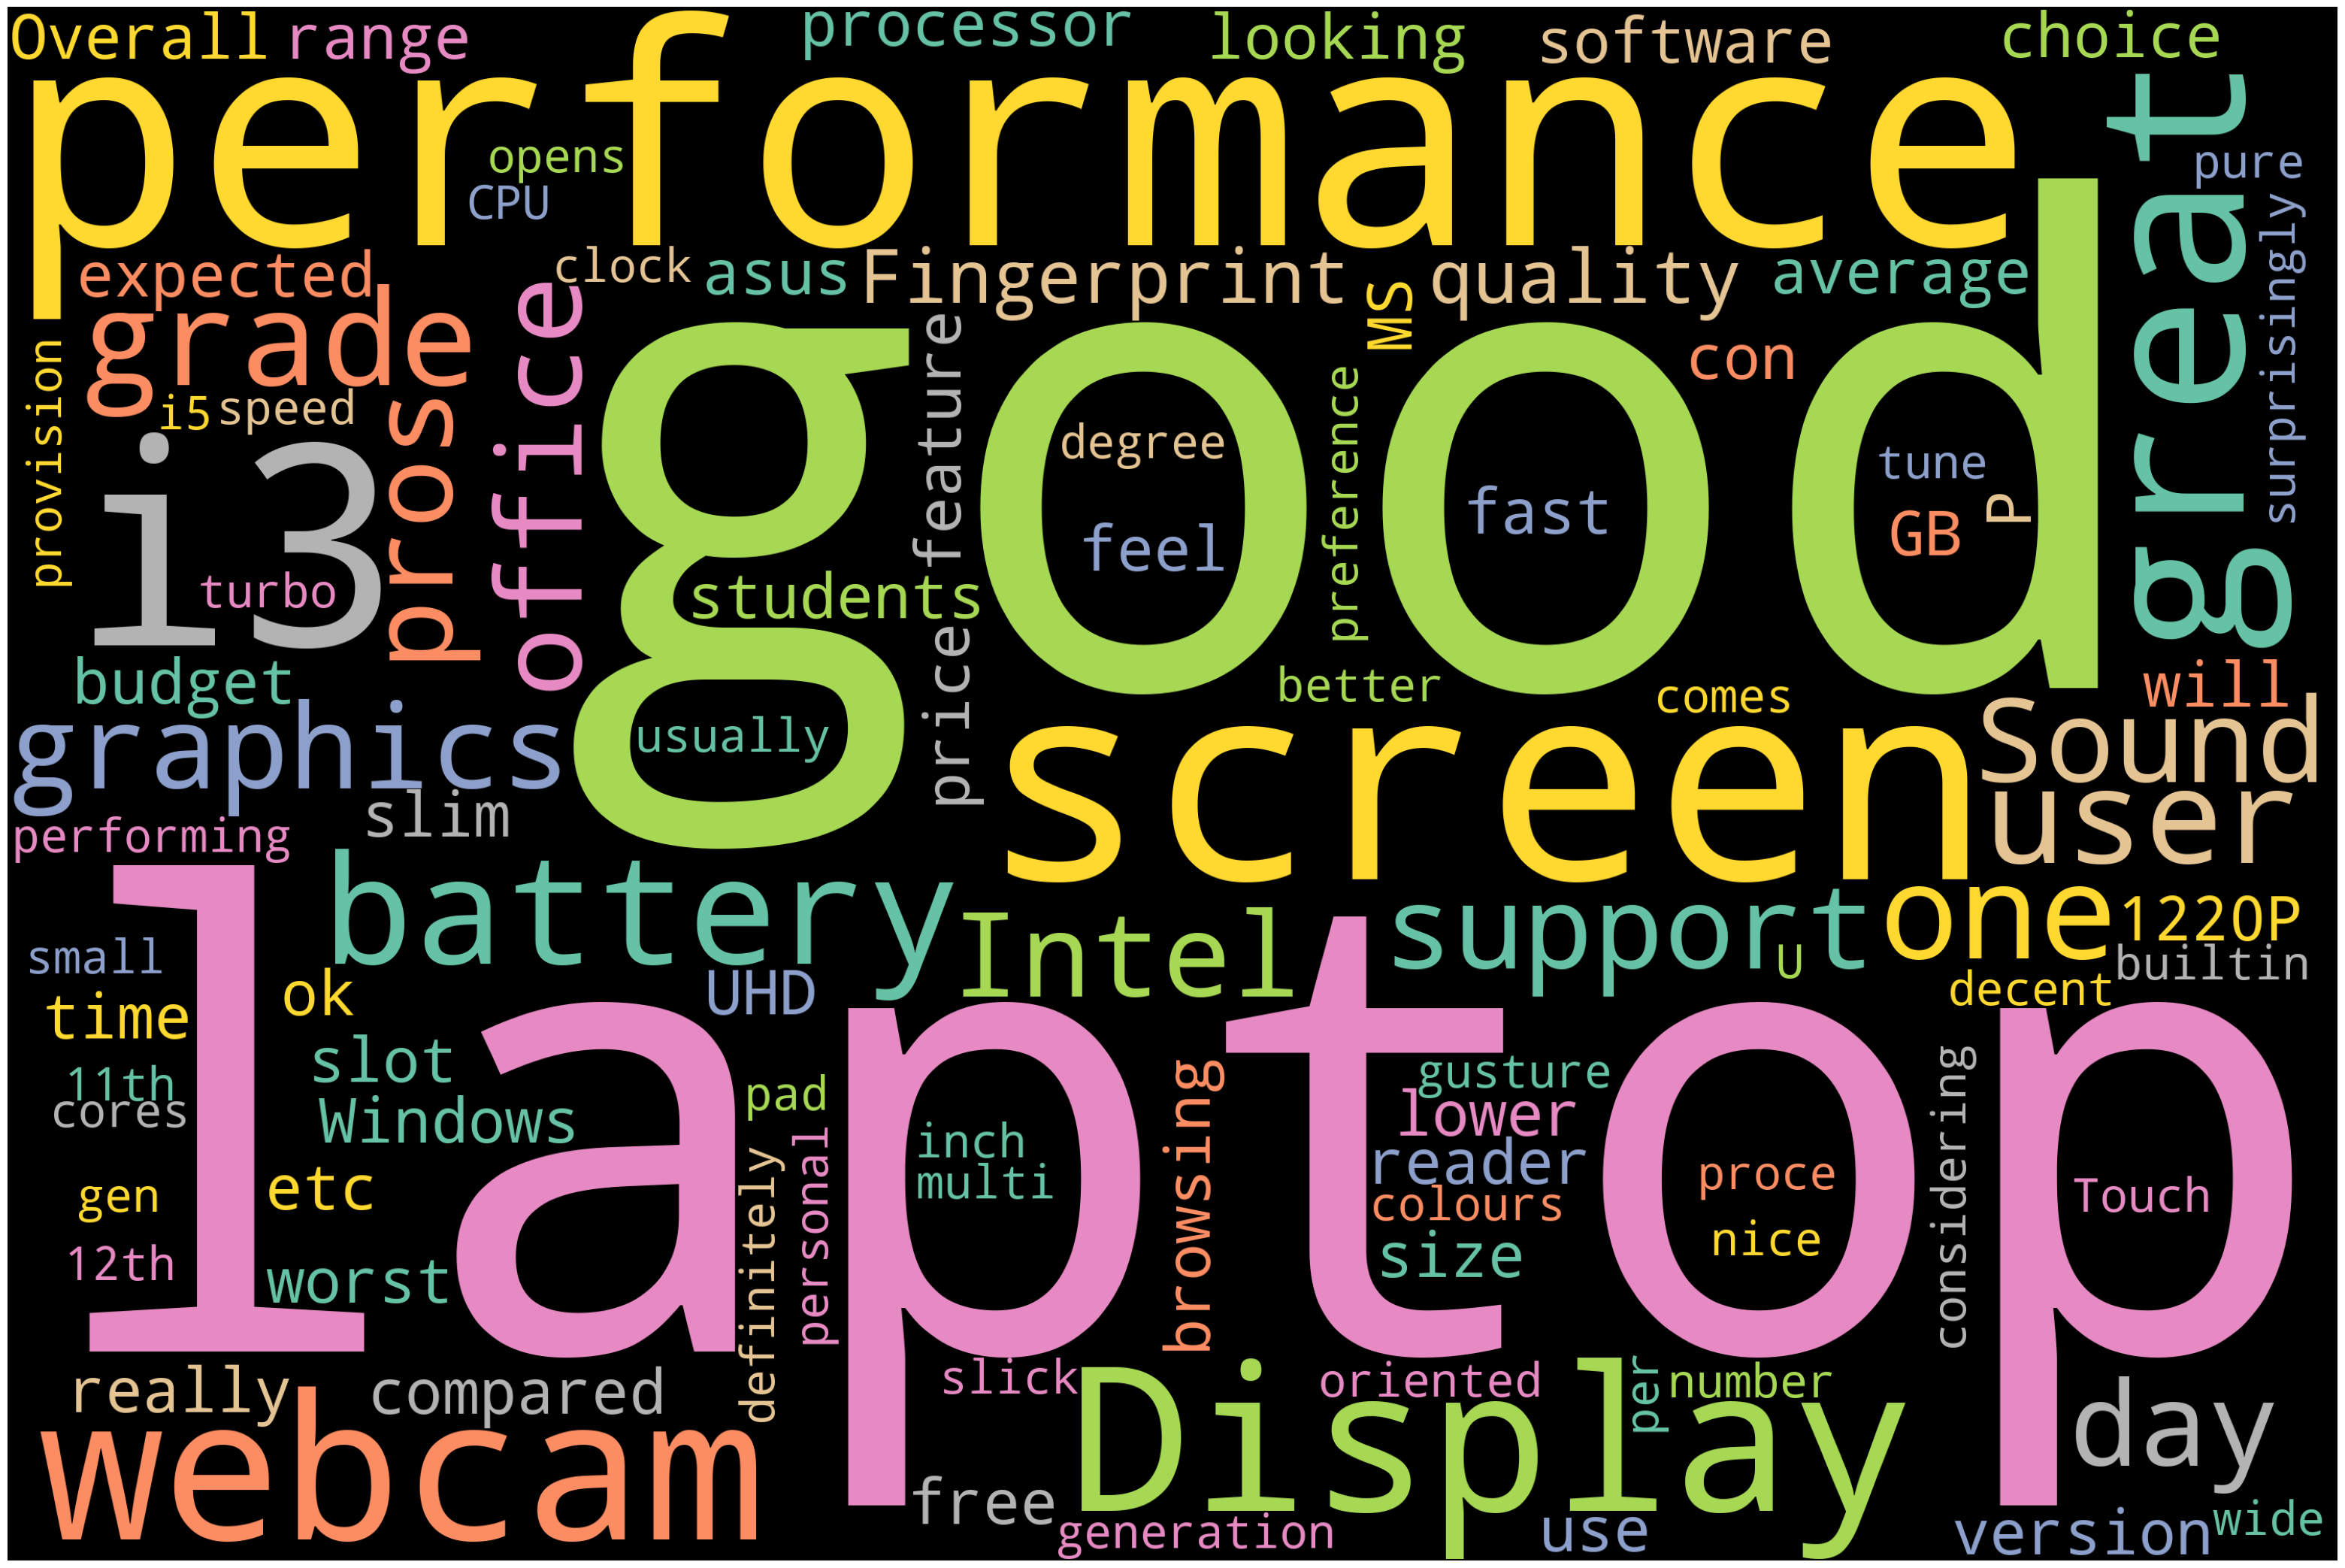

In [76]:
stopwords=STOPWORDS
wordcloud=WordCloud(width=3000,height=2000,background_color="black",max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
plot_cloud(wordcloud)

In [77]:
wordcloud.to_file("wordcloud.png")

## **Named Entity Recognition**

In [ ]:
nlp=spacy.load('en_core_web_sm')
one_block=text
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [ ]:
for token in doc_block[100:200]:
  print(token,token.pos_)

In [109]:
#filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['run', 'compute', 'applications', 'python', 'similation', 'softwares', 'screen', '%', 'felt', 'laptop', '-Thin', 'laptop', 'surprised', 'size', 'Day', 'day', 'performance', 'liked', 'time', 'reader', 'time', 'app', 'has', 'features', 'customisation', 'options', 'phone', 'link', 'transfer', 'files', 'quality', 'decentishComes', 'office', 'lifetimeCons', '-Poor', 'display', 'speakers', 'go', 'backlit', 'lid', 'gathers', 'fingerprint', 'marks', 'smudgesWebcam', 'quality', 'trackpad', 'feel', 'compared', 'bought', 'daughter', 'attending', 'classes', 'screen', 'webcam', 'suggest', 'one', 'use', 'webcam', 'configuration', 'browsing', 'write', 'pros', 'find', 'cons', 'months', 'usage', 'con', 'screen', 'quality', 'ask', 'price', 'standout', 'feature', 'battery', 'life', 'students', 'Gives', 'lifetime', 'office', 'validity', 'media', 'loaded', 'battery', 'support', 'coustomer', 'care', 'service', 'centre', 'user', 'laptop', 'bezzles', 'processorHere', 'description', 'pros', 'Processor', 'read

In [112]:
#counting the nouns and verbs
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(nouns_verbs)
sum_words=x.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10]

,word,count
0,laptop,8
1,performance,6
2,screen,5
3,display,4
4,has,4
5,i3,3
6,grade,3
7,graphics,3
8,webcam,3
9,day,3


<Axes: title={'center': 'Top 10 nouons and verbs'}, xlabel='word'>

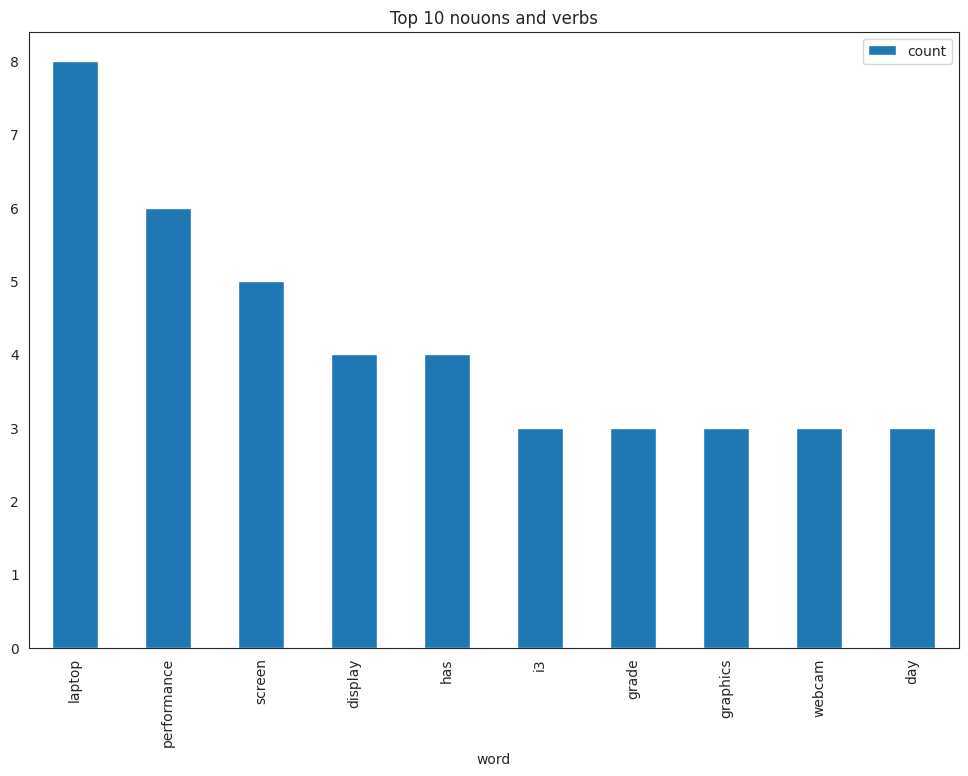

In [113]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouons and verbs')

# **EMOTION MINING**

In [102]:
afinn=pd.read_csv("/content/Afinn.csv",encoding="latin-1")

In [80]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(" ".join(review_df))
sentences[10:15]

['There is a free slot to add Harddisk also.Main cone is their wrong advertising about iris Xe graphics support.',
 'This processor version only supports intel UHD graphics.',
 'So this laptop is stictly not for gamers.',
 'Webcam is also very average.',
 'Only thing good to say about webcam is that, it has a privacy shutter.']

In [ ]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

In [82]:
affinity_scores=afinn.set_index('word')['value'].to_dict()

In [83]:
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

# **score each word in a sentence in lemmatised**

In [87]:
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text: str=None):
  sent_score=0
  if text:
    sentence=nlp(text)
    print(sentence)
    for word in sentence:
      sent_score += sentiment_lexicon.get(word.lemma_,0)
  return sent_score

In [88]:
sent_df['sentiment-value']=sent_df['sentence'].apply(calculate_sentiment)

If you are looking for a decent performing laptop under 45000, this is a good choice.
12th generation i3 is better than 11th gen i5 in CPU performance.
This i3 version (i3 1220P) is performance (P grade) oriented.
Laptops in this price range usually comes with i3 U grade (lower performance compared to P grade, so lower number of cores and turbo clock speed).
Hence this is a good choice for pure performance.Laptop is very slim and slick and screen opens 180 degree wide.
Its definitely a  nice looking laptop and surprisingly small, considering the screen is 15.6 inch size.
Display is ok for this proce range.
Windows 11 and asus builtin software has provision to tune display colours as per personal preference of user.Touch pad is multi gusture supporting and has good response.
RAM is a single 8 GB soldered module.
It is an advantage, because one slot is completely free and another 16 GB can be added.
There is a free slot to add Harddisk also.Main cone is their wrong advertising about iris

In [89]:
sent_df

,sentence,sentiment-value
0,If you are looking for a decent performing lap...,3
1,12th generation i3 is better than 11th gen i5 ...,0
2,This i3 version (i3 1220P) is performance (P g...,0
3,Laptops in this price range usually comes with...,0
4,Hence this is a good choice for pure performan...,5
5,Its definitely a nice looking laptop and surp...,3
6,Display is ok for this proce range.,0
7,Windows 11 and asus builtin software has provi...,5
8,RAM is a single 8 GB soldered module.,0
9,"It is an advantage, because one slot is comple...",3


In [91]:
sent_df.sort_values(by='sentiment-value').tail(10)

,sentence,sentiment-value
20,"Apart from these two, the configuration is goo...",3
14,"Only thing good to say about webcam is that, i...",3
9,"It is an advantage, because one slot is comple...",3
5,Its definitely a nice looking laptop and surp...,3
22,The only con is screen quality but can't ask f...,4
7,Windows 11 and asus builtin software has provi...,5
4,Hence this is a good choice for pure performan...,5
33,Sound is very low Good to useful,5
26,Worst battery and no support from Asus coustom...,6
17,Very good screen and is 100% anti-glare Here's...,15


In [93]:
sent_df['sentiment-value'].describe()

count    34.000000
mean      1.970588
std       2.999851
min       0.000000
25%       0.000000
50%       0.000000
75%       3.000000
max      15.000000
Name: sentiment-value, dtype: float64

In [94]:
sent_df[sent_df['sentiment-value']<=0].head()

,sentence,sentiment-value
1,12th generation i3 is better than 11th gen i5 ...,0
2,This i3 version (i3 1220P) is performance (P g...,0
3,Laptops in this price range usually comes with...,0
6,Display is ok for this proce range.,0
8,RAM is a single 8 GB soldered module.,0


In [95]:
sent_df[sent_df['sentiment-value']>=0].head()

,sentence,sentiment-value
0,If you are looking for a decent performing lap...,3
1,12th generation i3 is better than 11th gen i5 ...,0
2,This i3 version (i3 1220P) is performance (P g...,0
3,Laptops in this price range usually comes with...,0
4,Hence this is a good choice for pure performan...,5


In [96]:
sent_df[sent_df['sentiment-value']>=0].head()['sentence'].tolist()[0]

'If you are looking for a decent performing laptop under 45000, this is a good choice.'

In [97]:
sent_df['index']=range(0,len(sent_df))

In [98]:
sent_df

,sentence,sentiment-value,index
0,If you are looking for a decent performing lap...,3,0
1,12th generation i3 is better than 11th gen i5 ...,0,1
2,This i3 version (i3 1220P) is performance (P g...,0,2
3,Laptops in this price range usually comes with...,0,3
4,Hence this is a good choice for pure performan...,5,4
5,Its definitely a nice looking laptop and surp...,3,5
6,Display is ok for this proce range.,0,6
7,Windows 11 and asus builtin software has provi...,5,7
8,RAM is a single 8 GB soldered module.,0,8
9,"It is an advantage, because one slot is comple...",3,9


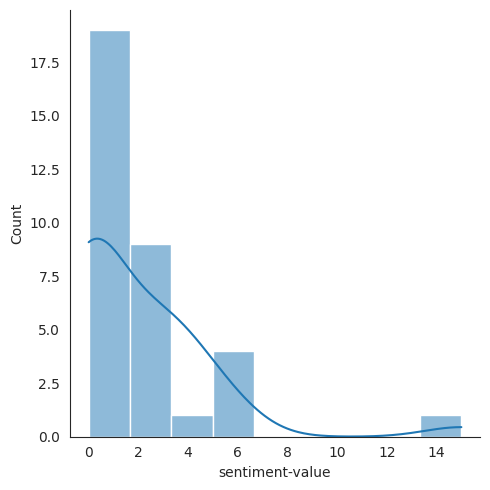

In [99]:
import seaborn as sns
sns.set_style(style='white')
sns.displot(data=sent_df,x='sentiment-value',kde=True)
plt.show()

<Axes: xlabel='index', ylabel='sentiment-value'>

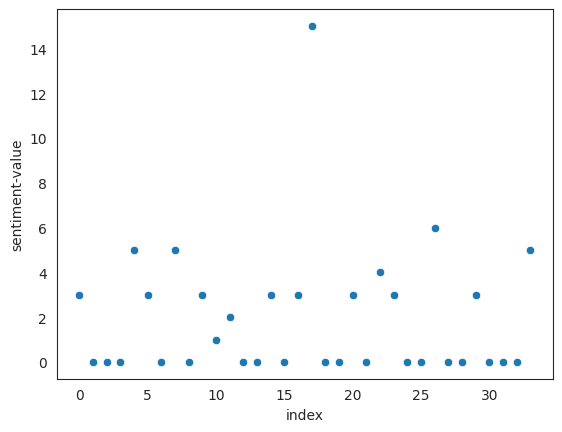

In [100]:
sns.scatterplot(y='sentiment-value',x='index',data=sent_df)

<Axes: xlabel='index', ylabel='sentiment-value'>

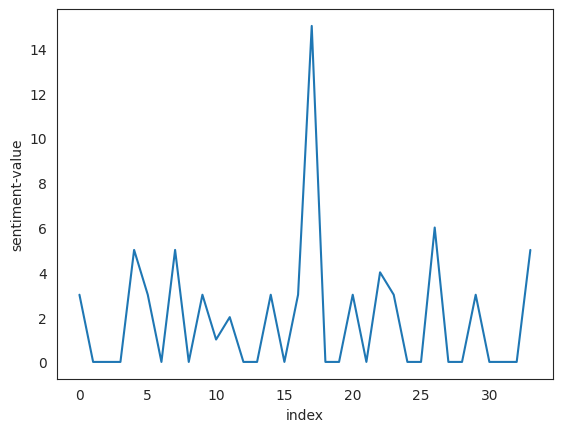

In [101]:
sns.lineplot(y='sentiment-value',x='index',data=sent_df)